# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 10.63 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

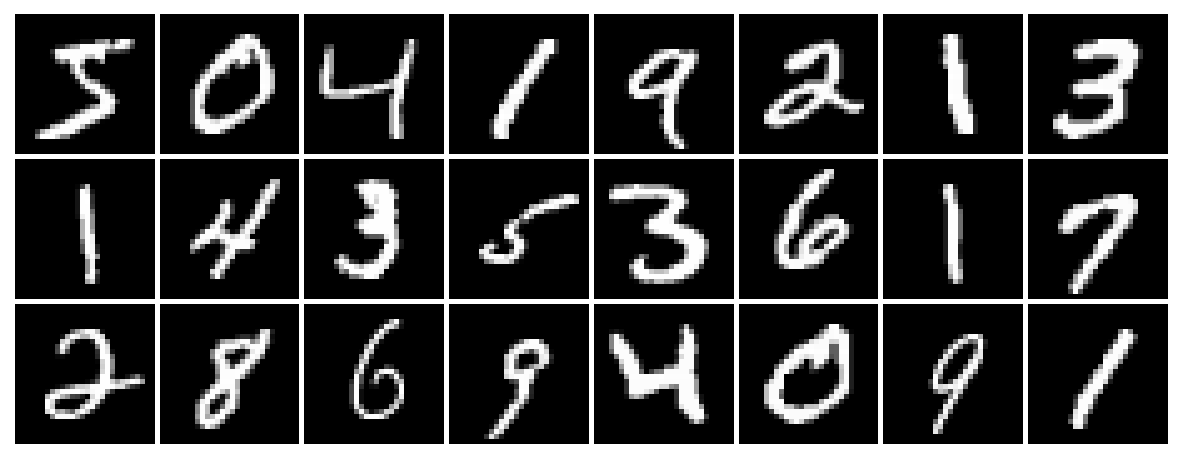

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


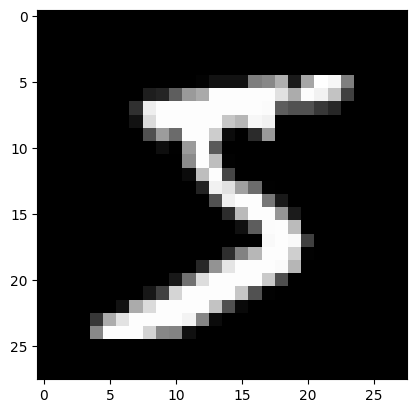

In [9]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [10]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [11]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.1485,  0.0739,  0.1881, -0.0308,  0.1436, -0.0946, -0.1314,  0.2907,
          0.0199, -0.4944],
        [ 0.0805, -0.1910,  0.4281, -0.1145,  0.1114, -0.1553, -0.2841,  0.4190,
         -0.1370, -0.4352],
        [-0.0111,  0.0812, -0.2312, -0.0822,  0.1915,  0.2489, -0.0709,  0.0684,
          0.1754, -0.0504],
        [-0.0253,  0.0324, -0.1077, -0.2519, -0.3249, -0.1375, -0.0755,  0.1963,
         -0.1416, -0.2618],
        [-0.3238,  0.2528, -0.0189,  0.1648, -0.0018, -0.0770,  0.0343,  0.0948,
         -0.4556, -0.1504]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [12]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [13]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-x0f_6v9_
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-x0f_6v9_
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=6653cfe3097a568453a98ccf7db682e3e4edead7e4fa153186a847326de3eda4
  Stored in directory: /tmp/pip-ephem-wheel-cache-vh9wkgi7/wheels/8a/88/98/69bcb99aba99a6bba9b2b81439cbda0101df40c49e639c4216
Successfully built torchviz


In [14]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.2997, grad_fn=<NllLossBackward0>)

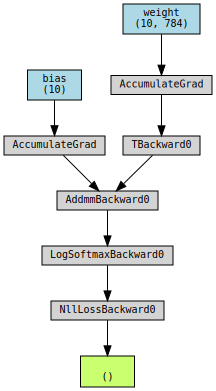

In [15]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [16]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [17]:
print('Final loss:', loss.item())

Final loss: 0.26577240228652954


### Visualizando gráfico de perda durante o treinamento

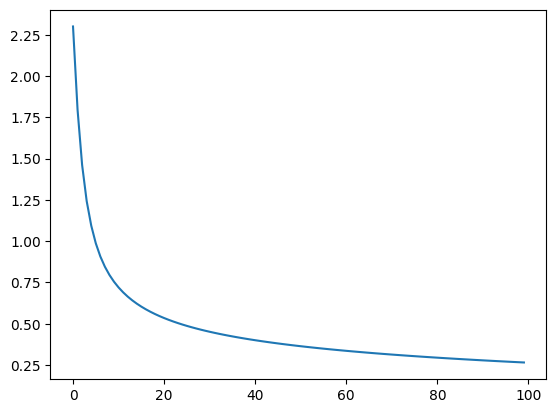

In [18]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [19]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.942


### Matriz de confusão com dados de treinamento e teste

In [20]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,1,2,1,0
2,0,1,91,1,0,1,0,1,2,1
3,0,0,0,87,0,2,0,0,0,0
4,0,0,1,0,102,1,1,2,0,3
5,0,2,0,2,0,83,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,1,1,0,82,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


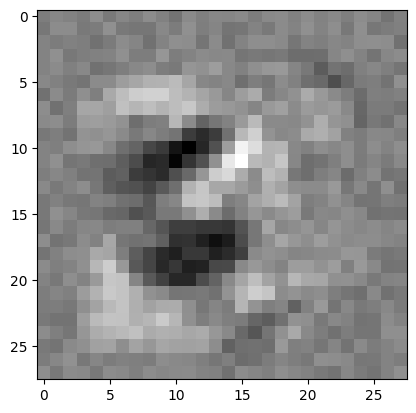

In [21]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

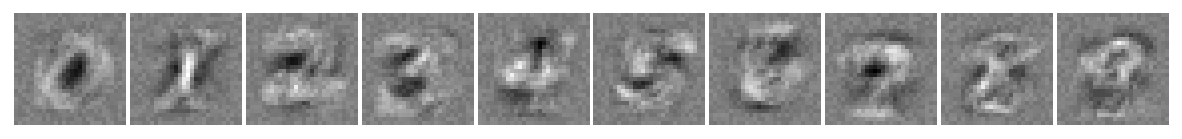

In [22]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [23]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print(f'Época {i+1}/{epochs} | Perda {loss.item():.4f} | Acurária: {accuracy:.4f}')

Época 1/100 | Perda 0.2644 | Acurária: 0.9420
Época 2/100 | Perda 0.2631 | Acurária: 0.9420
Época 3/100 | Perda 0.2618 | Acurária: 0.9420
Época 4/100 | Perda 0.2605 | Acurária: 0.9420
Época 5/100 | Perda 0.2592 | Acurária: 0.9420
Época 6/100 | Perda 0.2580 | Acurária: 0.9420
Época 7/100 | Perda 0.2567 | Acurária: 0.9420
Época 8/100 | Perda 0.2555 | Acurária: 0.9420
Época 9/100 | Perda 0.2543 | Acurária: 0.9420
Época 10/100 | Perda 0.2531 | Acurária: 0.9430
Época 11/100 | Perda 0.2519 | Acurária: 0.9440
Época 12/100 | Perda 0.2507 | Acurária: 0.9450
Época 13/100 | Perda 0.2495 | Acurária: 0.9450
Época 14/100 | Perda 0.2484 | Acurária: 0.9460
Época 15/100 | Perda 0.2472 | Acurária: 0.9460
Época 16/100 | Perda 0.2461 | Acurária: 0.9460
Época 17/100 | Perda 0.2450 | Acurária: 0.9460
Época 18/100 | Perda 0.2439 | Acurária: 0.9470
Época 19/100 | Perda 0.2428 | Acurária: 0.9470
Época 20/100 | Perda 0.2417 | Acurária: 0.9470
Época 21/100 | Perda 0.2406 | Acurária: 0.9470
Época 22/100 | Perda 0

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Época 1/100 | Perda 0.1783 | Acurária: 0.9680


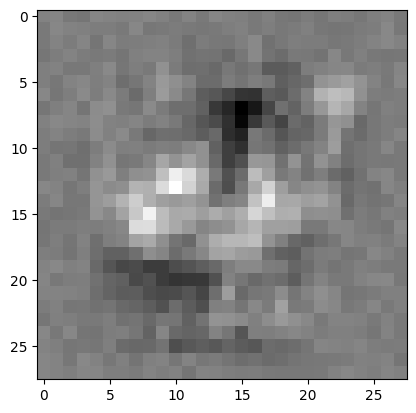

Época 2/100 | Perda 0.1777 | Acurária: 0.9680


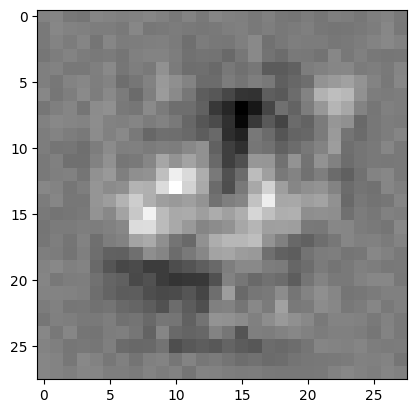

Época 3/100 | Perda 0.1771 | Acurária: 0.9680


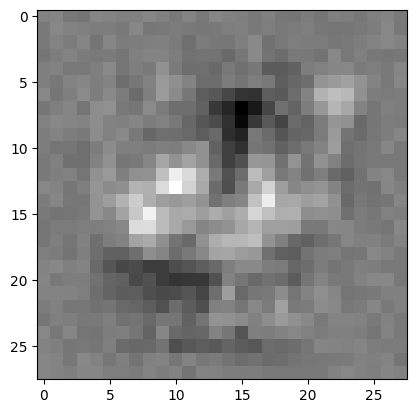

Época 4/100 | Perda 0.1765 | Acurária: 0.9690


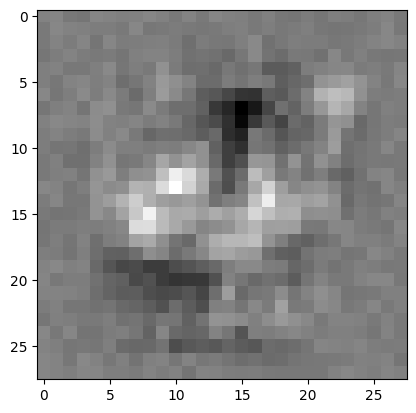

Época 5/100 | Perda 0.1760 | Acurária: 0.9690


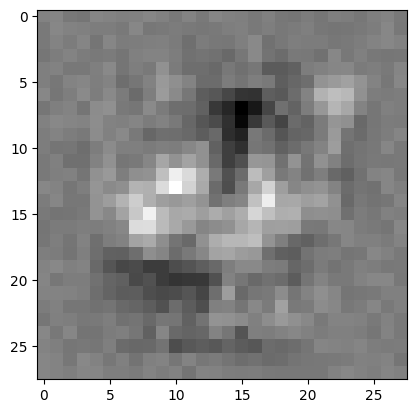

Época 6/100 | Perda 0.1754 | Acurária: 0.9690


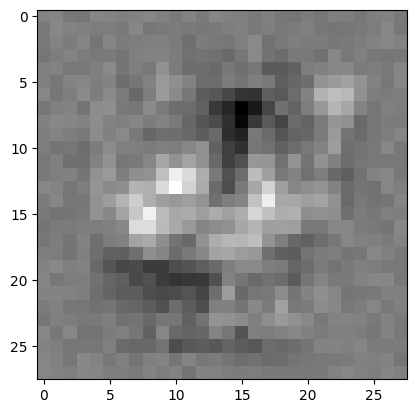

Época 7/100 | Perda 0.1749 | Acurária: 0.9690


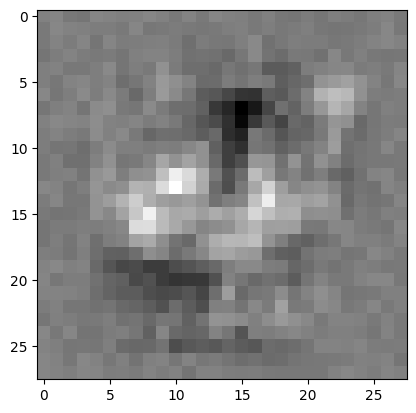

Época 8/100 | Perda 0.1743 | Acurária: 0.9690


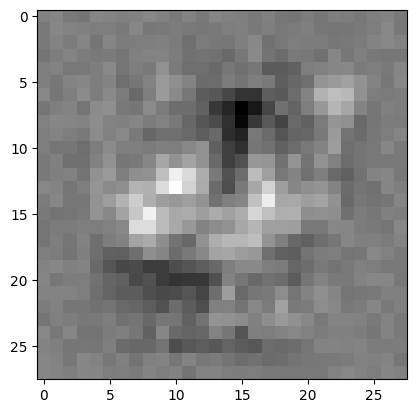

Época 9/100 | Perda 0.1738 | Acurária: 0.9690


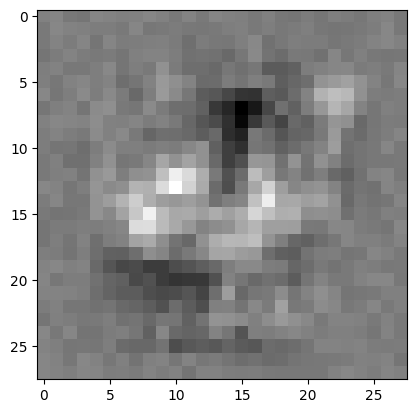

Época 10/100 | Perda 0.1732 | Acurária: 0.9690


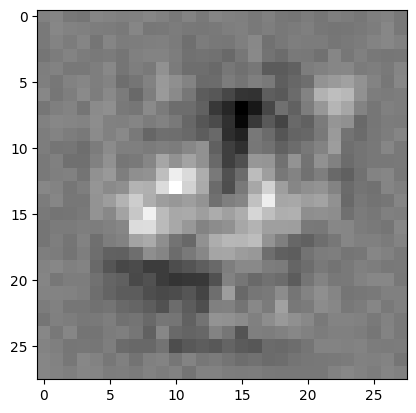

Época 11/100 | Perda 0.1727 | Acurária: 0.9690


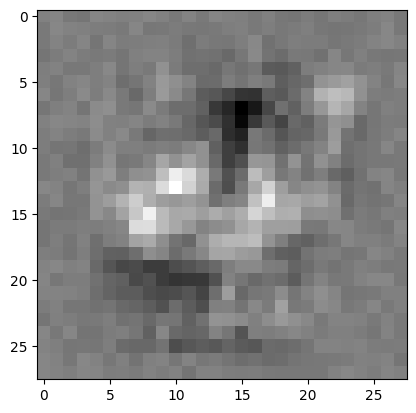

Época 12/100 | Perda 0.1721 | Acurária: 0.9690


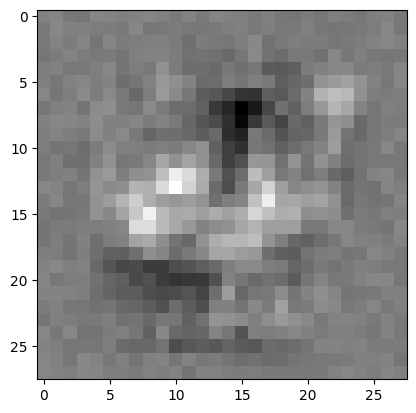

Época 13/100 | Perda 0.1716 | Acurária: 0.9690


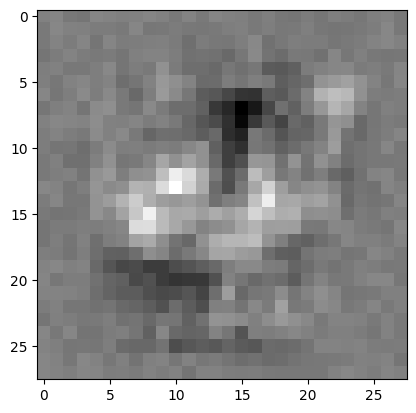

Época 14/100 | Perda 0.1711 | Acurária: 0.9690


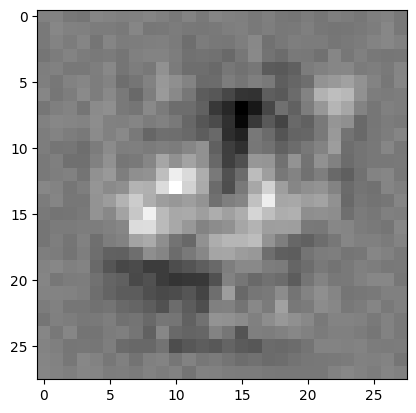

Época 15/100 | Perda 0.1705 | Acurária: 0.9690


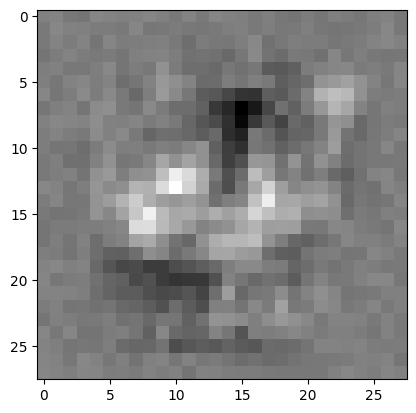

Época 16/100 | Perda 0.1700 | Acurária: 0.9690


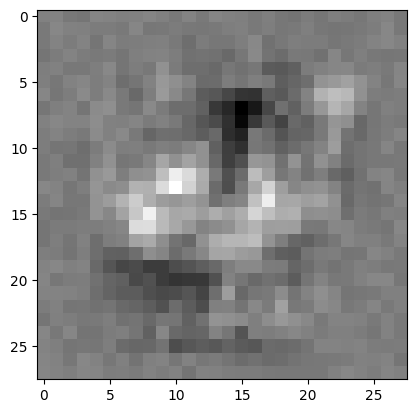

Época 17/100 | Perda 0.1695 | Acurária: 0.9690


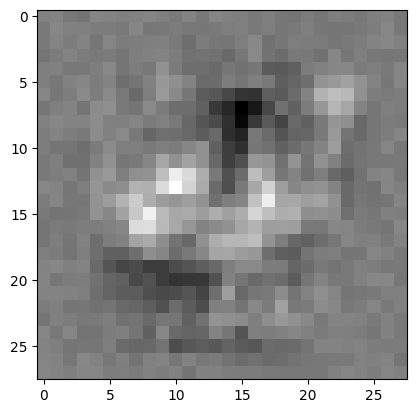

Época 18/100 | Perda 0.1690 | Acurária: 0.9700


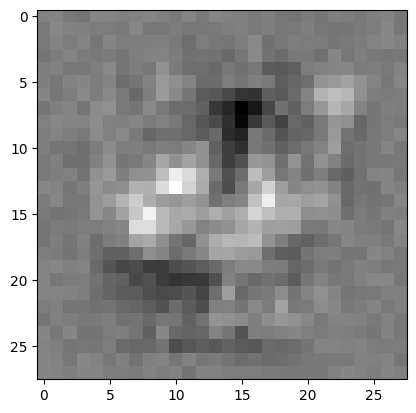

Época 19/100 | Perda 0.1684 | Acurária: 0.9700


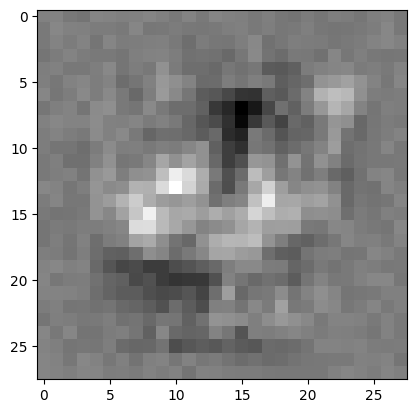

Época 20/100 | Perda 0.1679 | Acurária: 0.9700


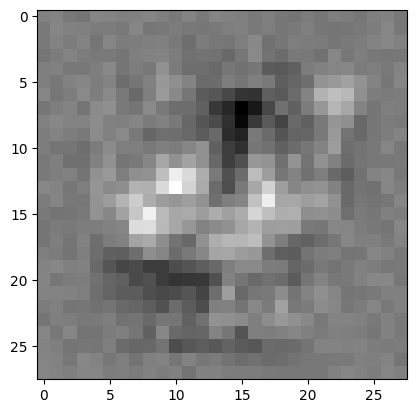

Época 21/100 | Perda 0.1674 | Acurária: 0.9700


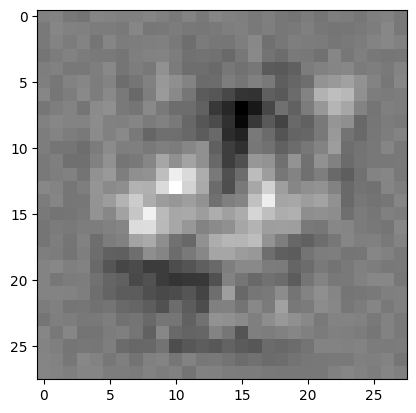

Época 22/100 | Perda 0.1669 | Acurária: 0.9700


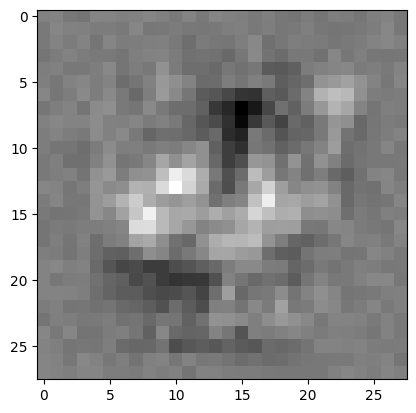

Época 23/100 | Perda 0.1664 | Acurária: 0.9700


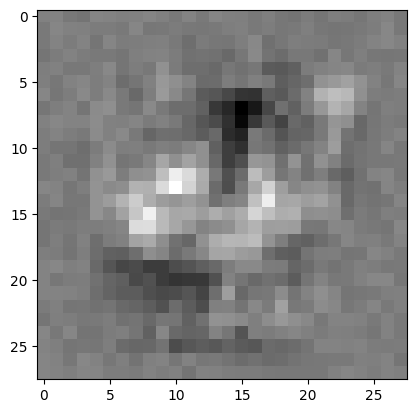

Época 24/100 | Perda 0.1659 | Acurária: 0.9700


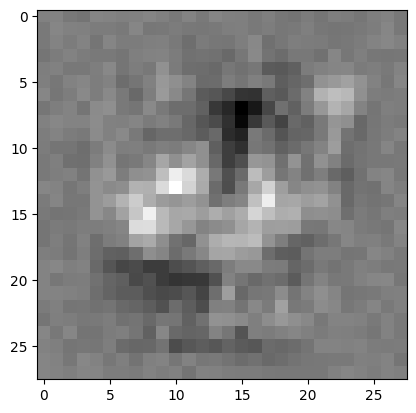

Época 25/100 | Perda 0.1654 | Acurária: 0.9700


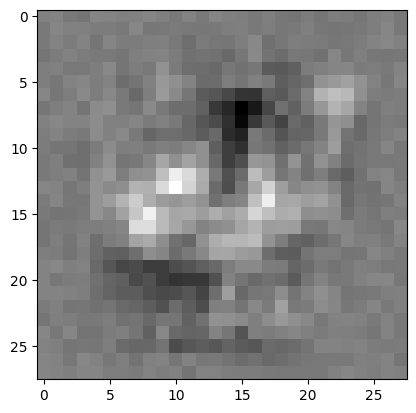

Época 26/100 | Perda 0.1649 | Acurária: 0.9700


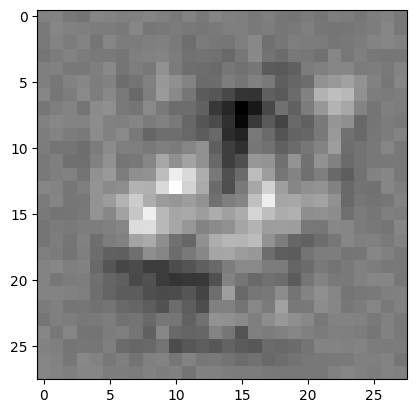

Época 27/100 | Perda 0.1644 | Acurária: 0.9700


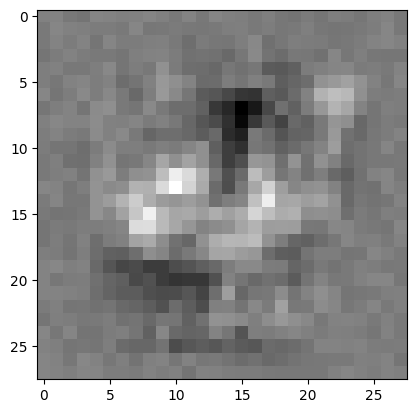

Época 28/100 | Perda 0.1639 | Acurária: 0.9700


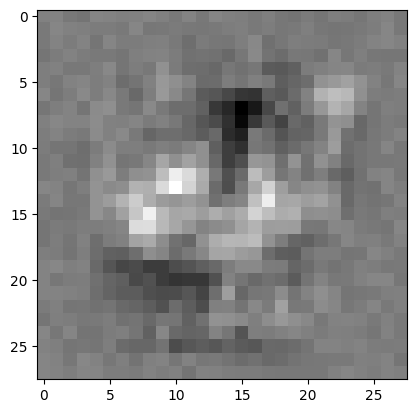

Época 29/100 | Perda 0.1634 | Acurária: 0.9700


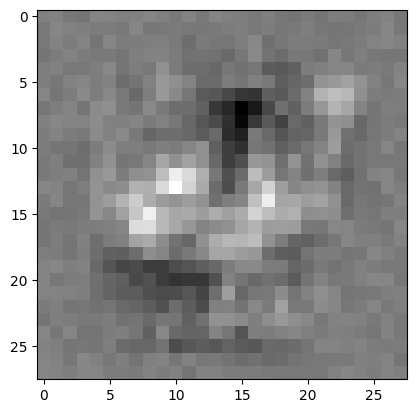

Época 30/100 | Perda 0.1629 | Acurária: 0.9710


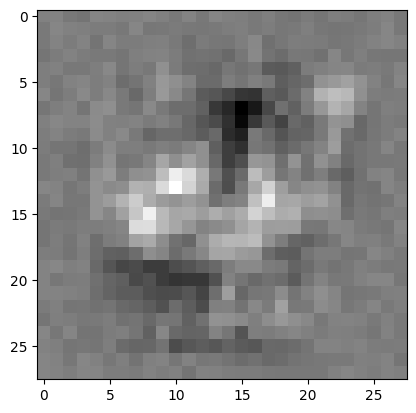

Época 31/100 | Perda 0.1624 | Acurária: 0.9710


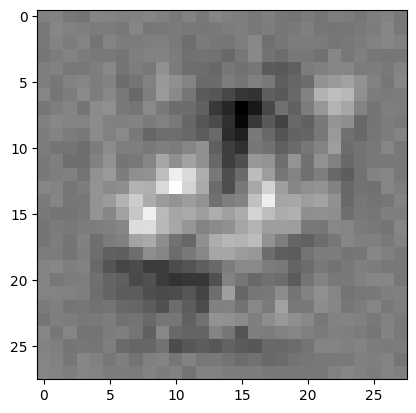

Época 32/100 | Perda 0.1620 | Acurária: 0.9710


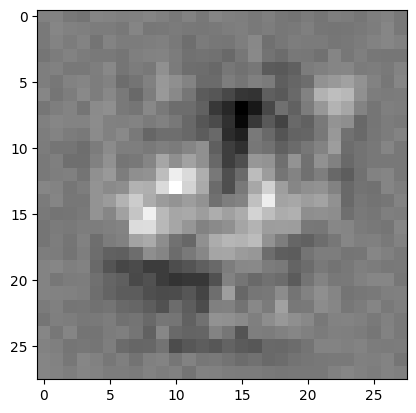

Época 33/100 | Perda 0.1615 | Acurária: 0.9710


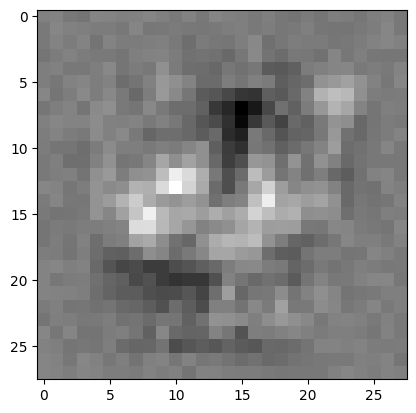

Época 34/100 | Perda 0.1610 | Acurária: 0.9710


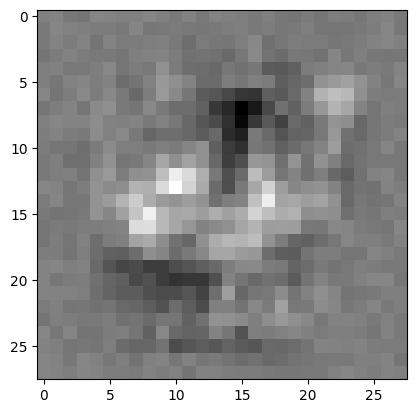

Época 35/100 | Perda 0.1605 | Acurária: 0.9710


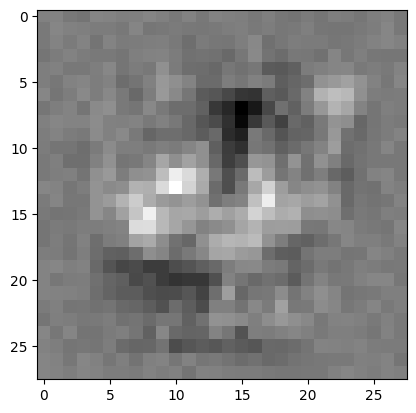

Época 36/100 | Perda 0.1601 | Acurária: 0.9710


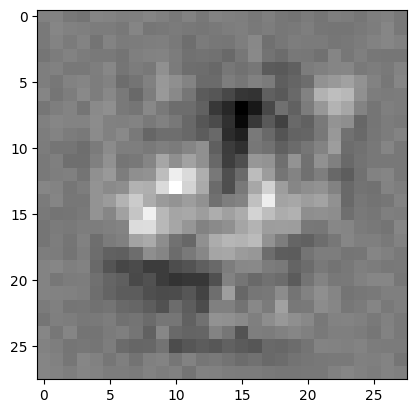

Época 37/100 | Perda 0.1596 | Acurária: 0.9710


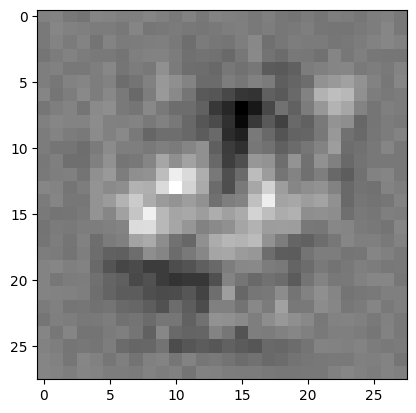

Época 38/100 | Perda 0.1591 | Acurária: 0.9710


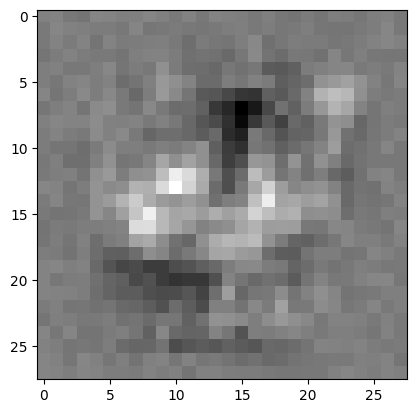

Época 39/100 | Perda 0.1587 | Acurária: 0.9710


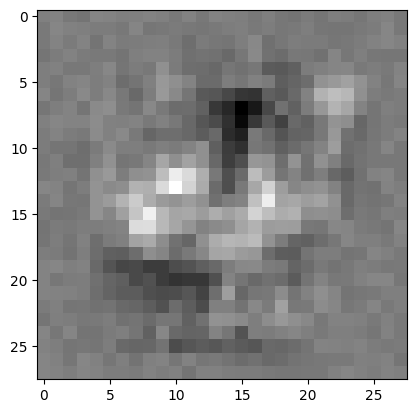

Época 40/100 | Perda 0.1582 | Acurária: 0.9720


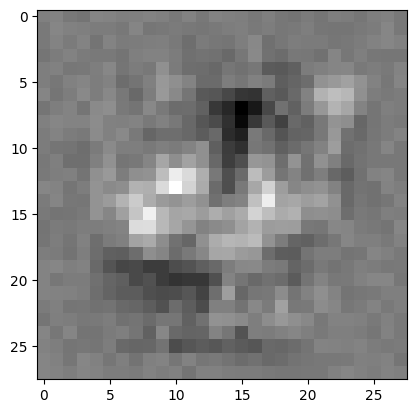

Época 41/100 | Perda 0.1577 | Acurária: 0.9720


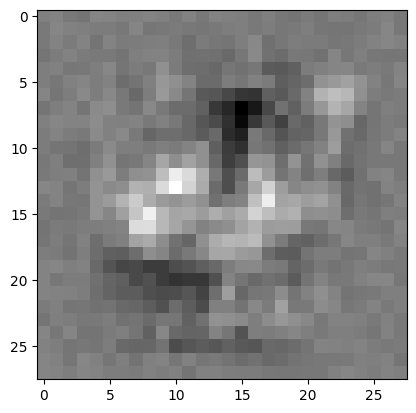

Época 42/100 | Perda 0.1573 | Acurária: 0.9720


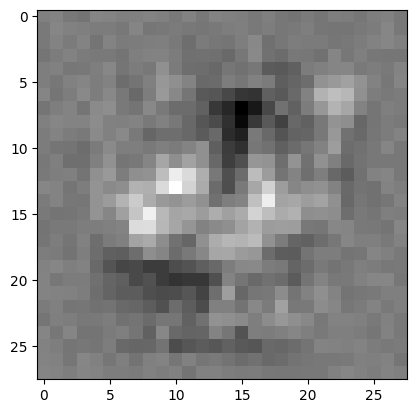

Época 43/100 | Perda 0.1568 | Acurária: 0.9730


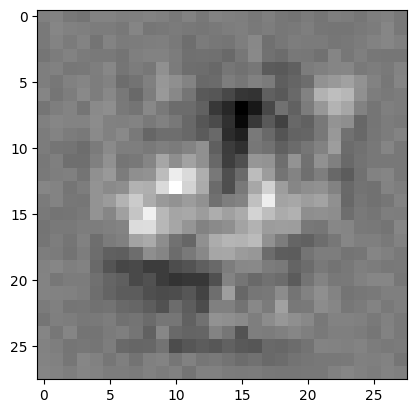

Época 44/100 | Perda 0.1564 | Acurária: 0.9740


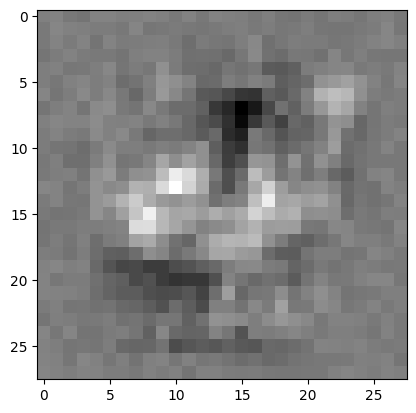

Época 45/100 | Perda 0.1559 | Acurária: 0.9740


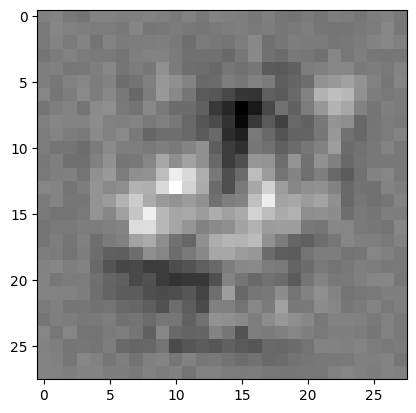

Época 46/100 | Perda 0.1555 | Acurária: 0.9740


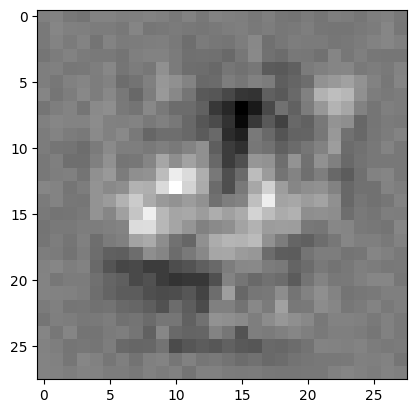

Época 47/100 | Perda 0.1550 | Acurária: 0.9740


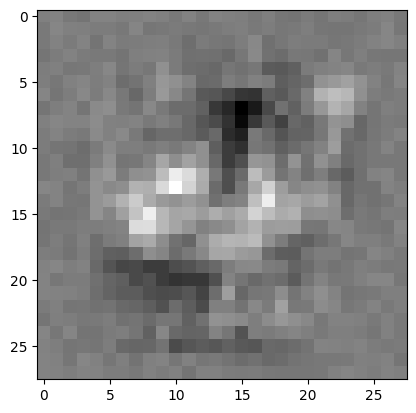

Época 48/100 | Perda 0.1546 | Acurária: 0.9740


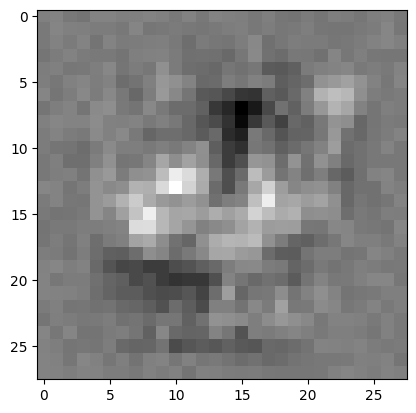

Época 49/100 | Perda 0.1542 | Acurária: 0.9740


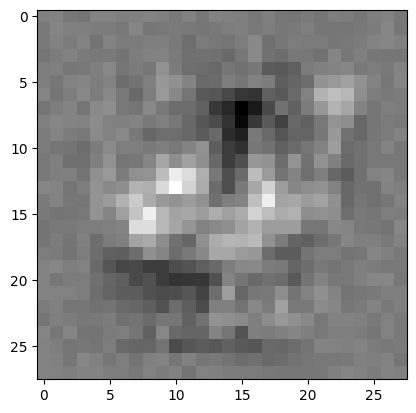

Época 50/100 | Perda 0.1537 | Acurária: 0.9740


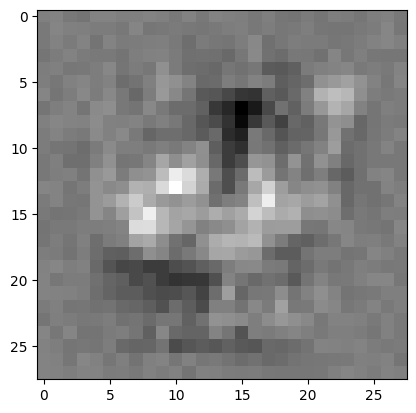

Época 51/100 | Perda 0.1533 | Acurária: 0.9740


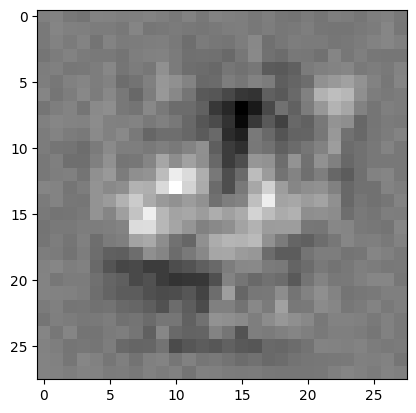

Época 52/100 | Perda 0.1529 | Acurária: 0.9740


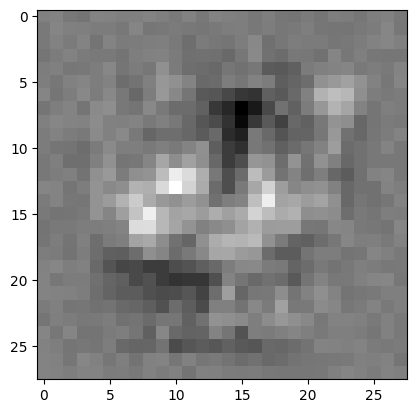

Época 53/100 | Perda 0.1524 | Acurária: 0.9740


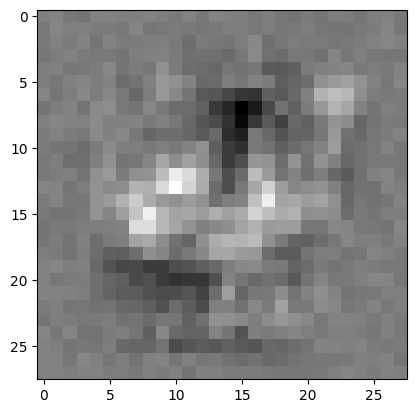

Época 54/100 | Perda 0.1520 | Acurária: 0.9740


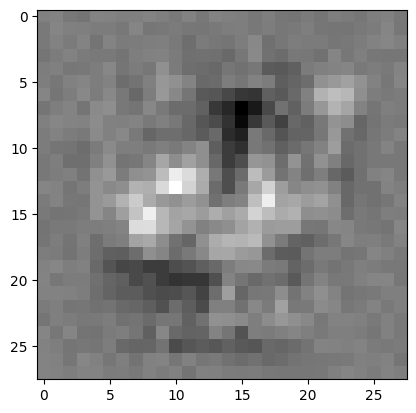

Época 55/100 | Perda 0.1516 | Acurária: 0.9740


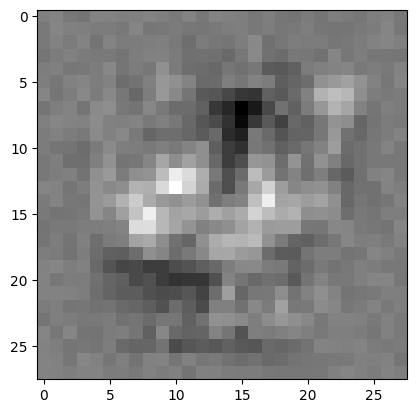

Época 56/100 | Perda 0.1511 | Acurária: 0.9740


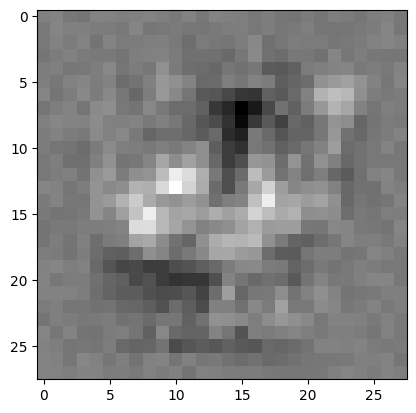

Época 57/100 | Perda 0.1507 | Acurária: 0.9740


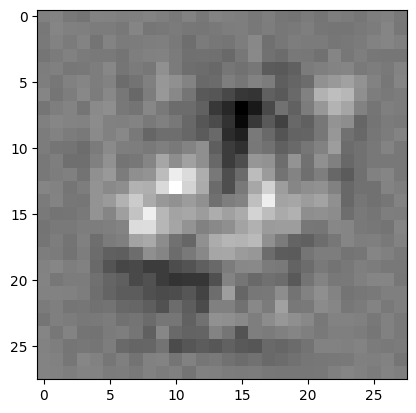

Época 58/100 | Perda 0.1503 | Acurária: 0.9740


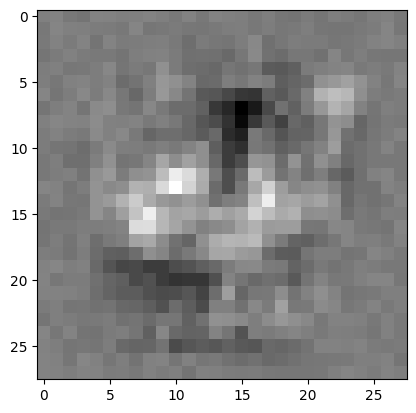

Época 59/100 | Perda 0.1499 | Acurária: 0.9740


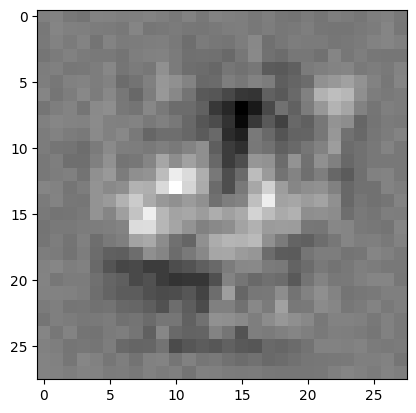

Época 60/100 | Perda 0.1495 | Acurária: 0.9750


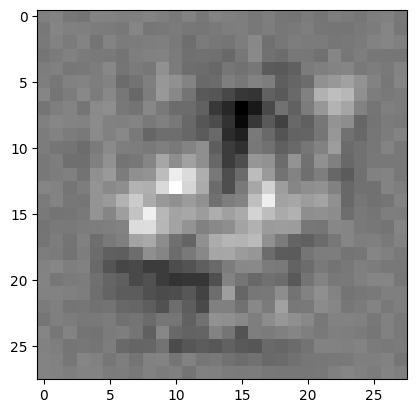

Época 61/100 | Perda 0.1491 | Acurária: 0.9750


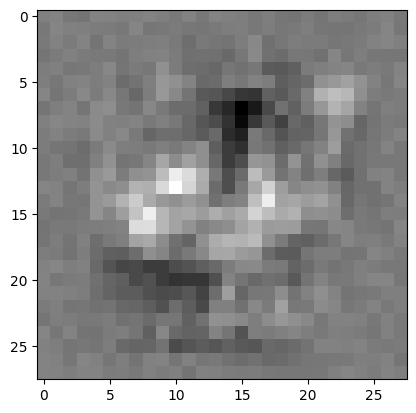

Época 62/100 | Perda 0.1486 | Acurária: 0.9750


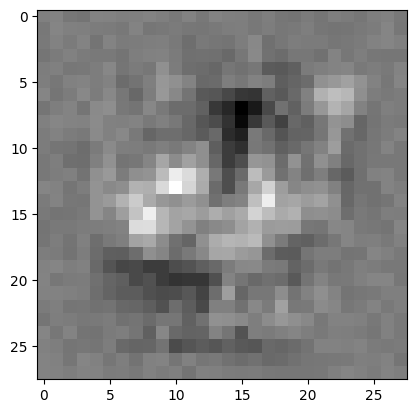

Época 63/100 | Perda 0.1482 | Acurária: 0.9750


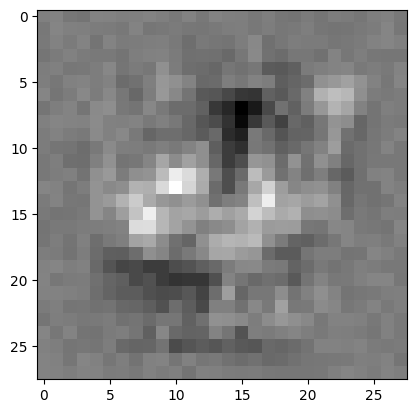

Época 64/100 | Perda 0.1478 | Acurária: 0.9750


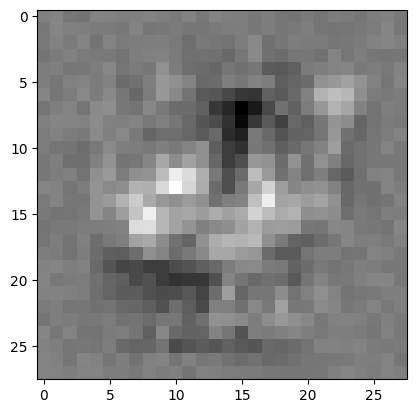

Época 65/100 | Perda 0.1474 | Acurária: 0.9750


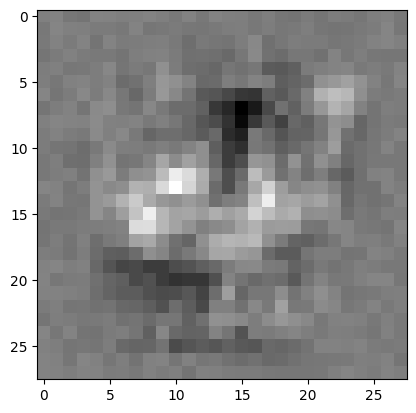

Época 66/100 | Perda 0.1470 | Acurária: 0.9750


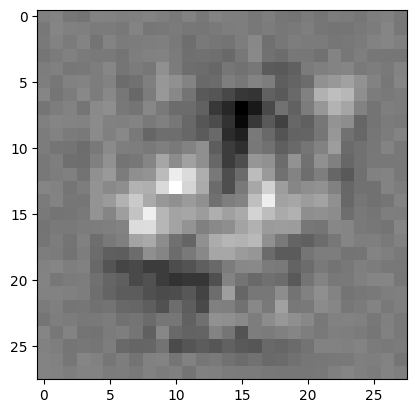

Época 67/100 | Perda 0.1466 | Acurária: 0.9750


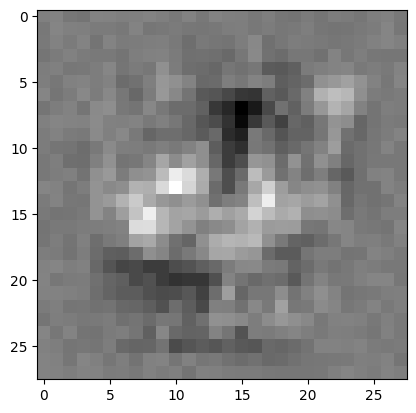

Época 68/100 | Perda 0.1462 | Acurária: 0.9750


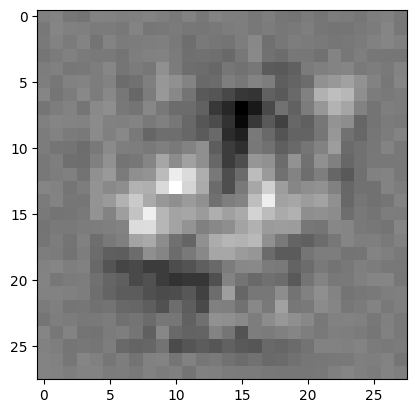

Época 69/100 | Perda 0.1458 | Acurária: 0.9750


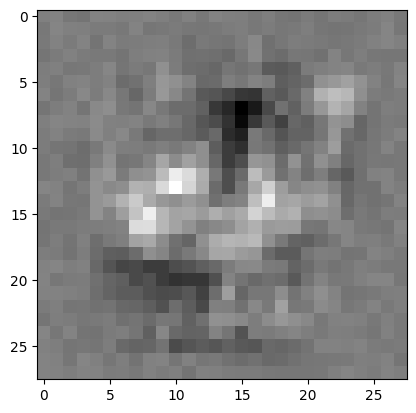

Época 70/100 | Perda 0.1454 | Acurária: 0.9750


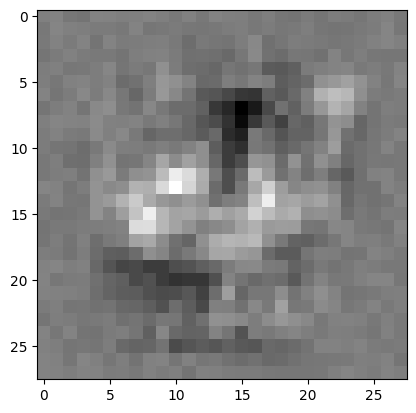

Época 71/100 | Perda 0.1450 | Acurária: 0.9750


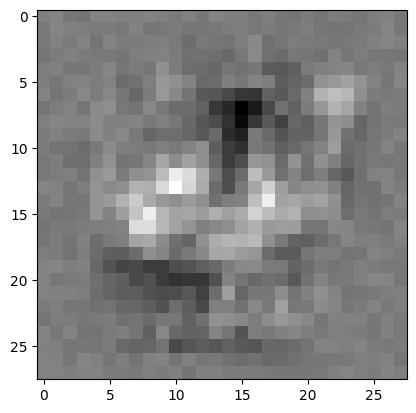

Época 72/100 | Perda 0.1446 | Acurária: 0.9750


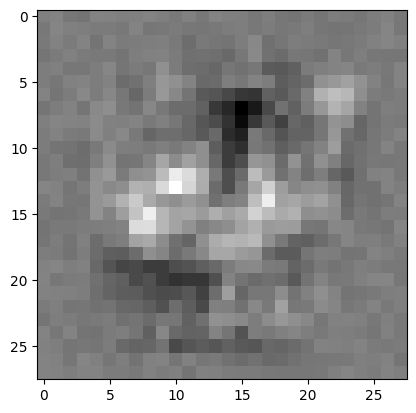

Época 73/100 | Perda 0.1443 | Acurária: 0.9750


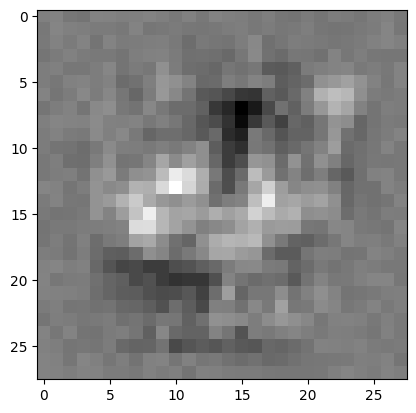

Época 74/100 | Perda 0.1439 | Acurária: 0.9760


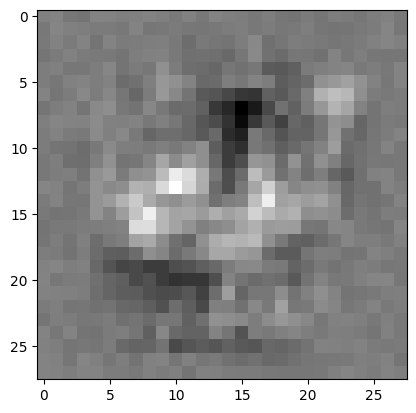

Época 75/100 | Perda 0.1435 | Acurária: 0.9760


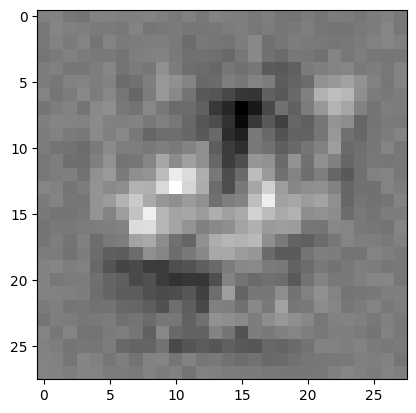

Época 76/100 | Perda 0.1431 | Acurária: 0.9760


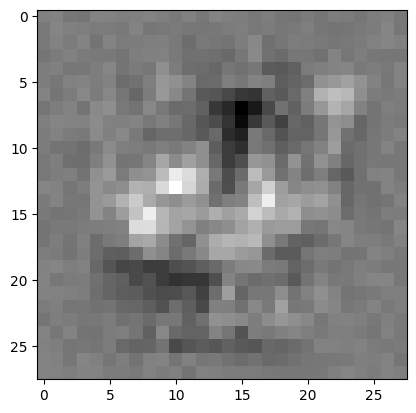

Época 77/100 | Perda 0.1427 | Acurária: 0.9760


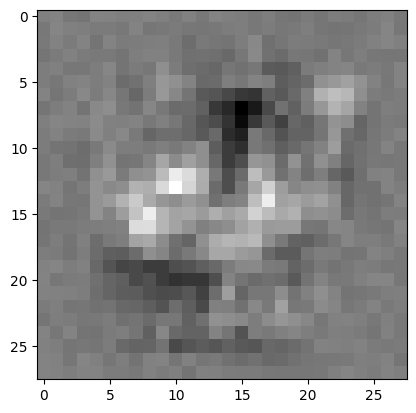

Época 78/100 | Perda 0.1423 | Acurária: 0.9760


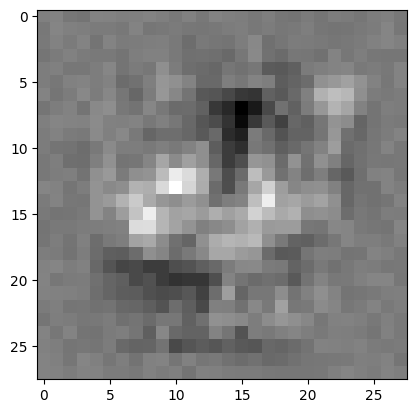

Época 79/100 | Perda 0.1420 | Acurária: 0.9760


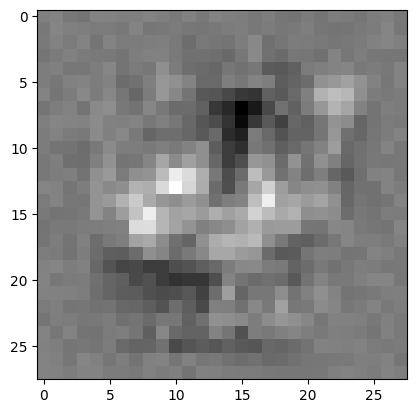

Época 80/100 | Perda 0.1416 | Acurária: 0.9760


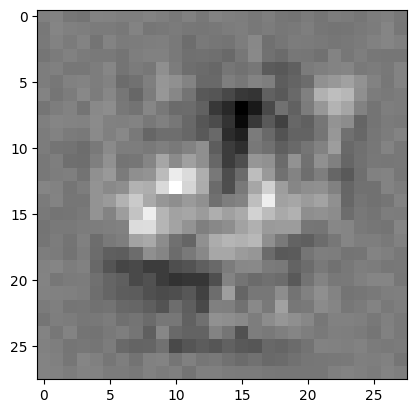

Época 81/100 | Perda 0.1412 | Acurária: 0.9760


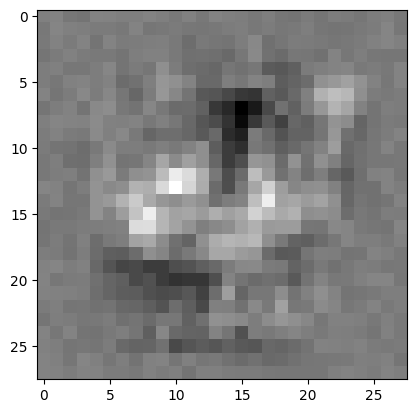

Época 82/100 | Perda 0.1408 | Acurária: 0.9760


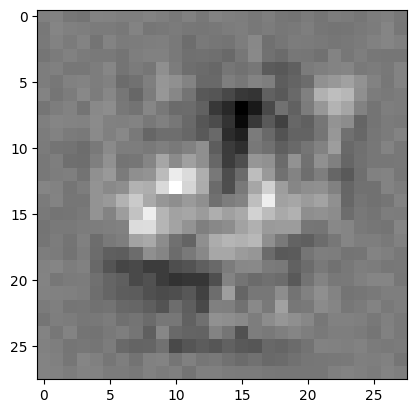

Época 83/100 | Perda 0.1405 | Acurária: 0.9760


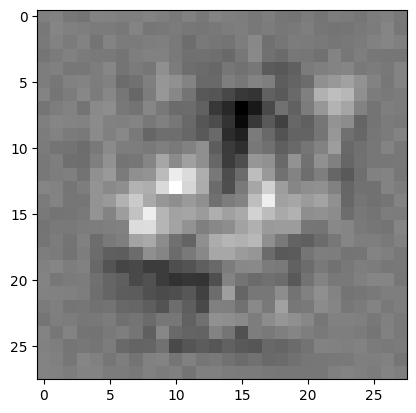

Época 84/100 | Perda 0.1401 | Acurária: 0.9760


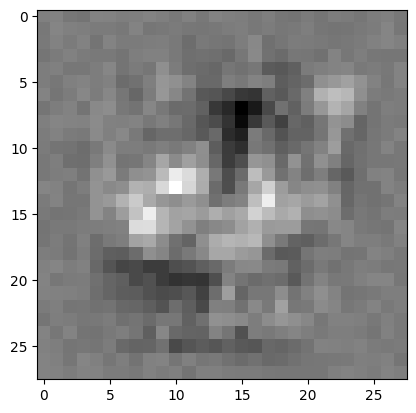

Época 85/100 | Perda 0.1397 | Acurária: 0.9760


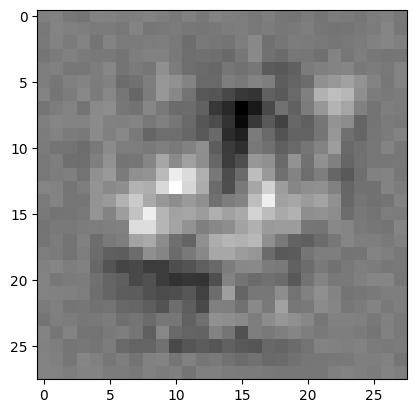

Época 86/100 | Perda 0.1394 | Acurária: 0.9760


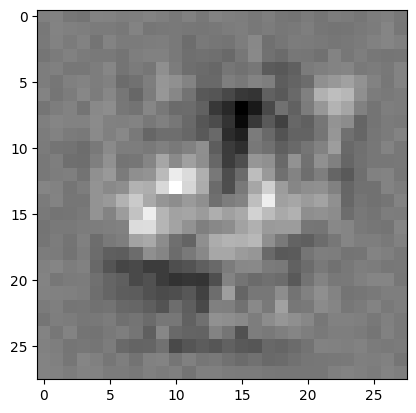

Época 87/100 | Perda 0.1390 | Acurária: 0.9760


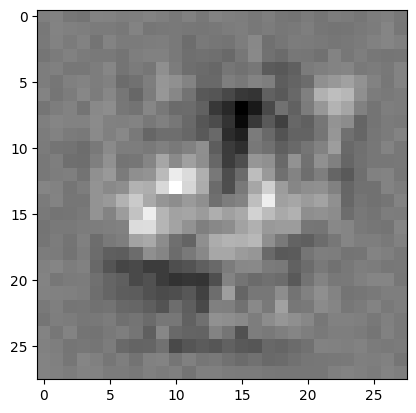

Época 88/100 | Perda 0.1386 | Acurária: 0.9760


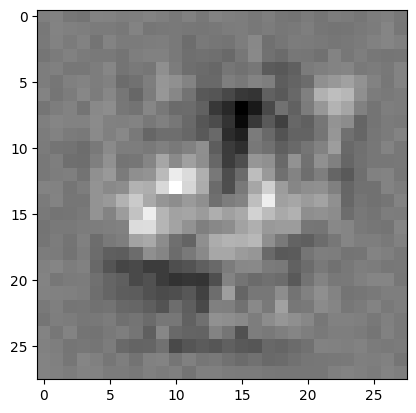

Época 89/100 | Perda 0.1383 | Acurária: 0.9760


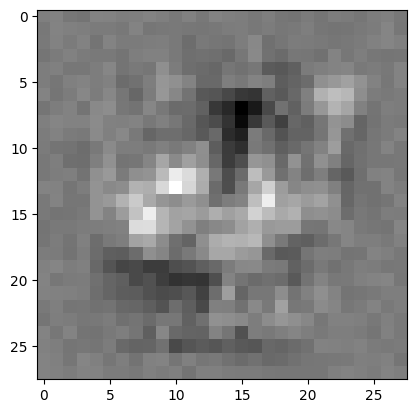

Época 90/100 | Perda 0.1379 | Acurária: 0.9760


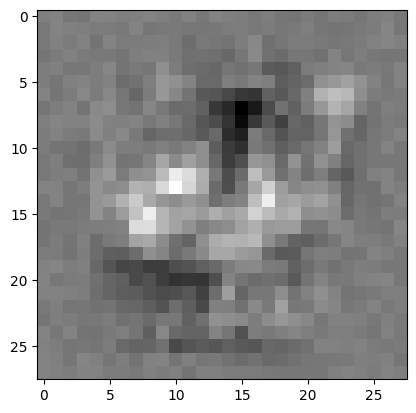

Época 91/100 | Perda 0.1376 | Acurária: 0.9760


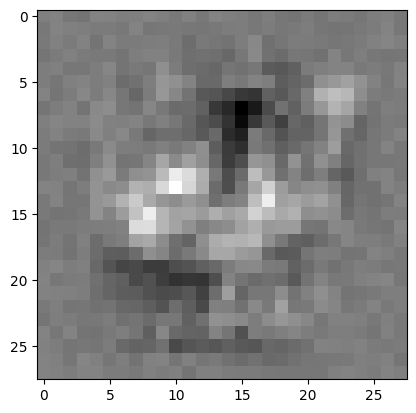

Época 92/100 | Perda 0.1372 | Acurária: 0.9760


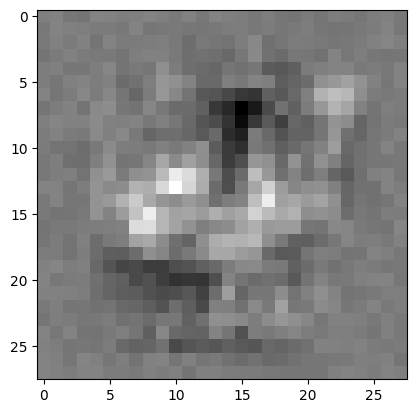

Época 93/100 | Perda 0.1369 | Acurária: 0.9760


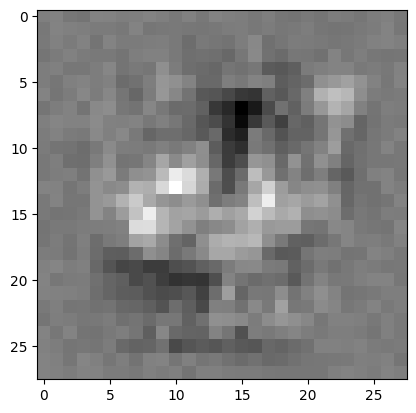

Época 94/100 | Perda 0.1365 | Acurária: 0.9760


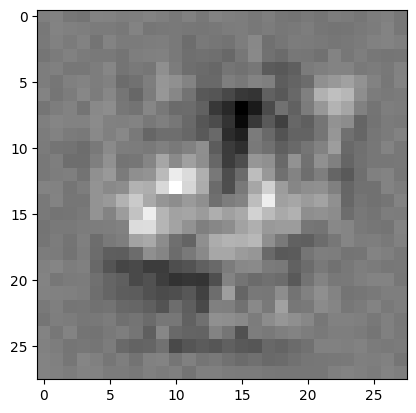

Época 95/100 | Perda 0.1362 | Acurária: 0.9760


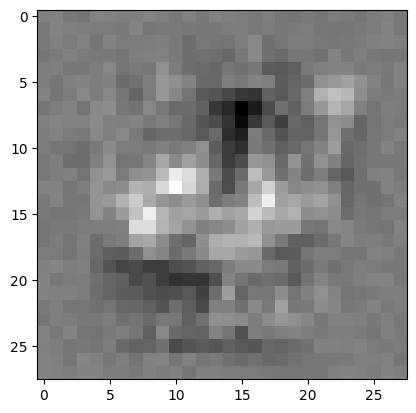

Época 96/100 | Perda 0.1358 | Acurária: 0.9760


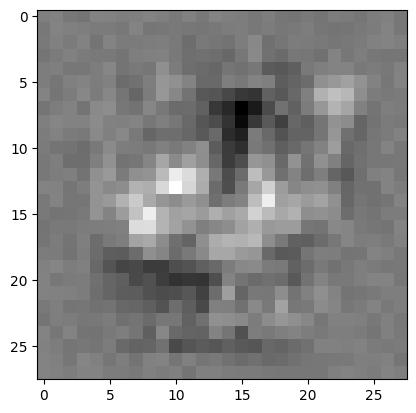

Época 97/100 | Perda 0.1355 | Acurária: 0.9760


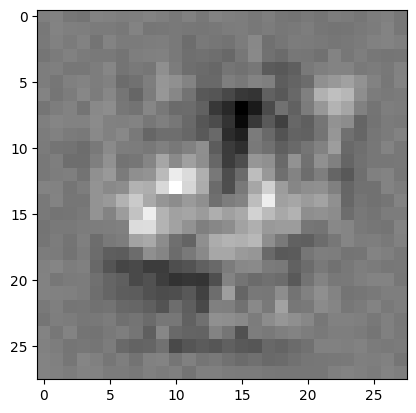

Época 98/100 | Perda 0.1351 | Acurária: 0.9760


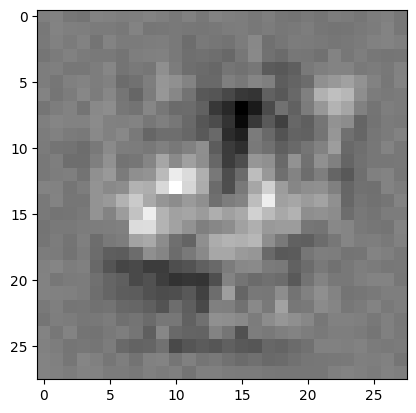

Época 99/100 | Perda 0.1348 | Acurária: 0.9760


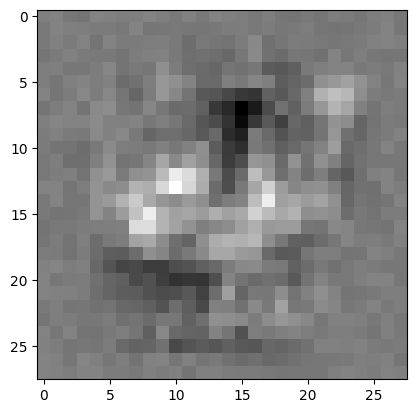

Época 100/100 | Perda 0.1344 | Acurária: 0.9760


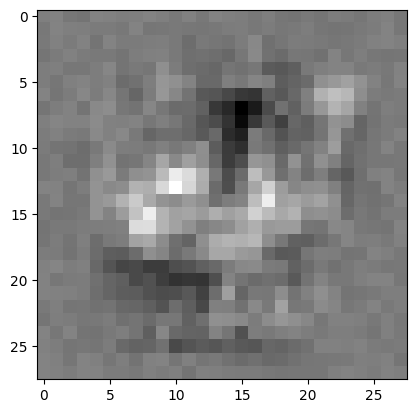

In [24]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print(f'Época {i+1}/{epochs} | Perda {loss.item():.4f} | Acurária: {accuracy:.4f}')

    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

# Aprendizados
